<a href="https://colab.research.google.com/github/Wondupper/Analyze_EGE/blob/main/Analysis_Ege.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np

In [ ]:
uploaded = files.upload()

Saving 5_OGE_2019_Эксперты и анализ.xlsx to 5_OGE_2019_Эксперты и анализ.xlsx
Saving geo.xlsx to geo.xlsx


In [ ]:
tabl = pd.read_excel('5_OGE_2019_Эксперты и анализ.xlsx')
rao = pd.read_excel('geo.xlsx')

In [ ]:
#1
df1 = pd.DataFrame(tabl)
df2 = pd.DataFrame(rao)
df_copy = df1.copy()
pb1 = df_copy['Первичный балл'].describe()
print(pb1)
pb = df_copy['Первичный балл']
print(pb.mode())
print(pb.std()*pb.std())

count    5986.000000
mean       13.290511
std         5.408305
min         0.000000
25%         9.000000
50%        14.000000
75%        18.000000
max        22.000000
Name: Первичный балл, dtype: float64
0    13
Name: Первичный балл, dtype: int64
29.249757900710122


<Axes: xlabel='Вид ОО,Оцека по 5'>

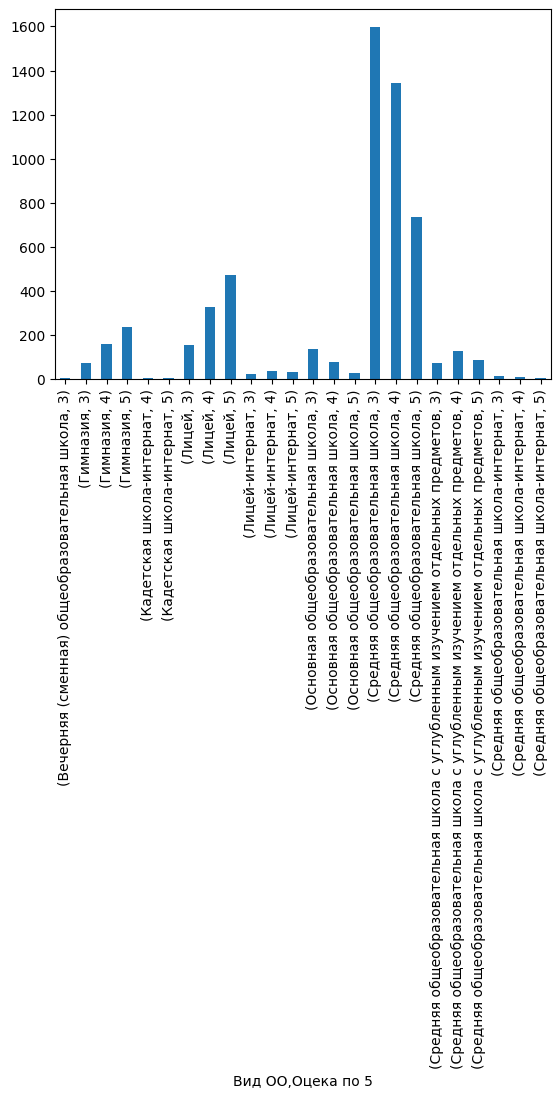

In [ ]:
#2
df_copy = df1.copy()
df_filtred_2 = df_copy[df_copy['Оцека по 5']>2]
df_filtred2 = df_filtred_2.groupby(['Вид ОО', 'Оцека по 5']).size()
df_filtred2.plot.bar(x = 'Вид ОО', y ='Оцека по 5')

<Axes: xlabel='Район,Оцека по 5'>

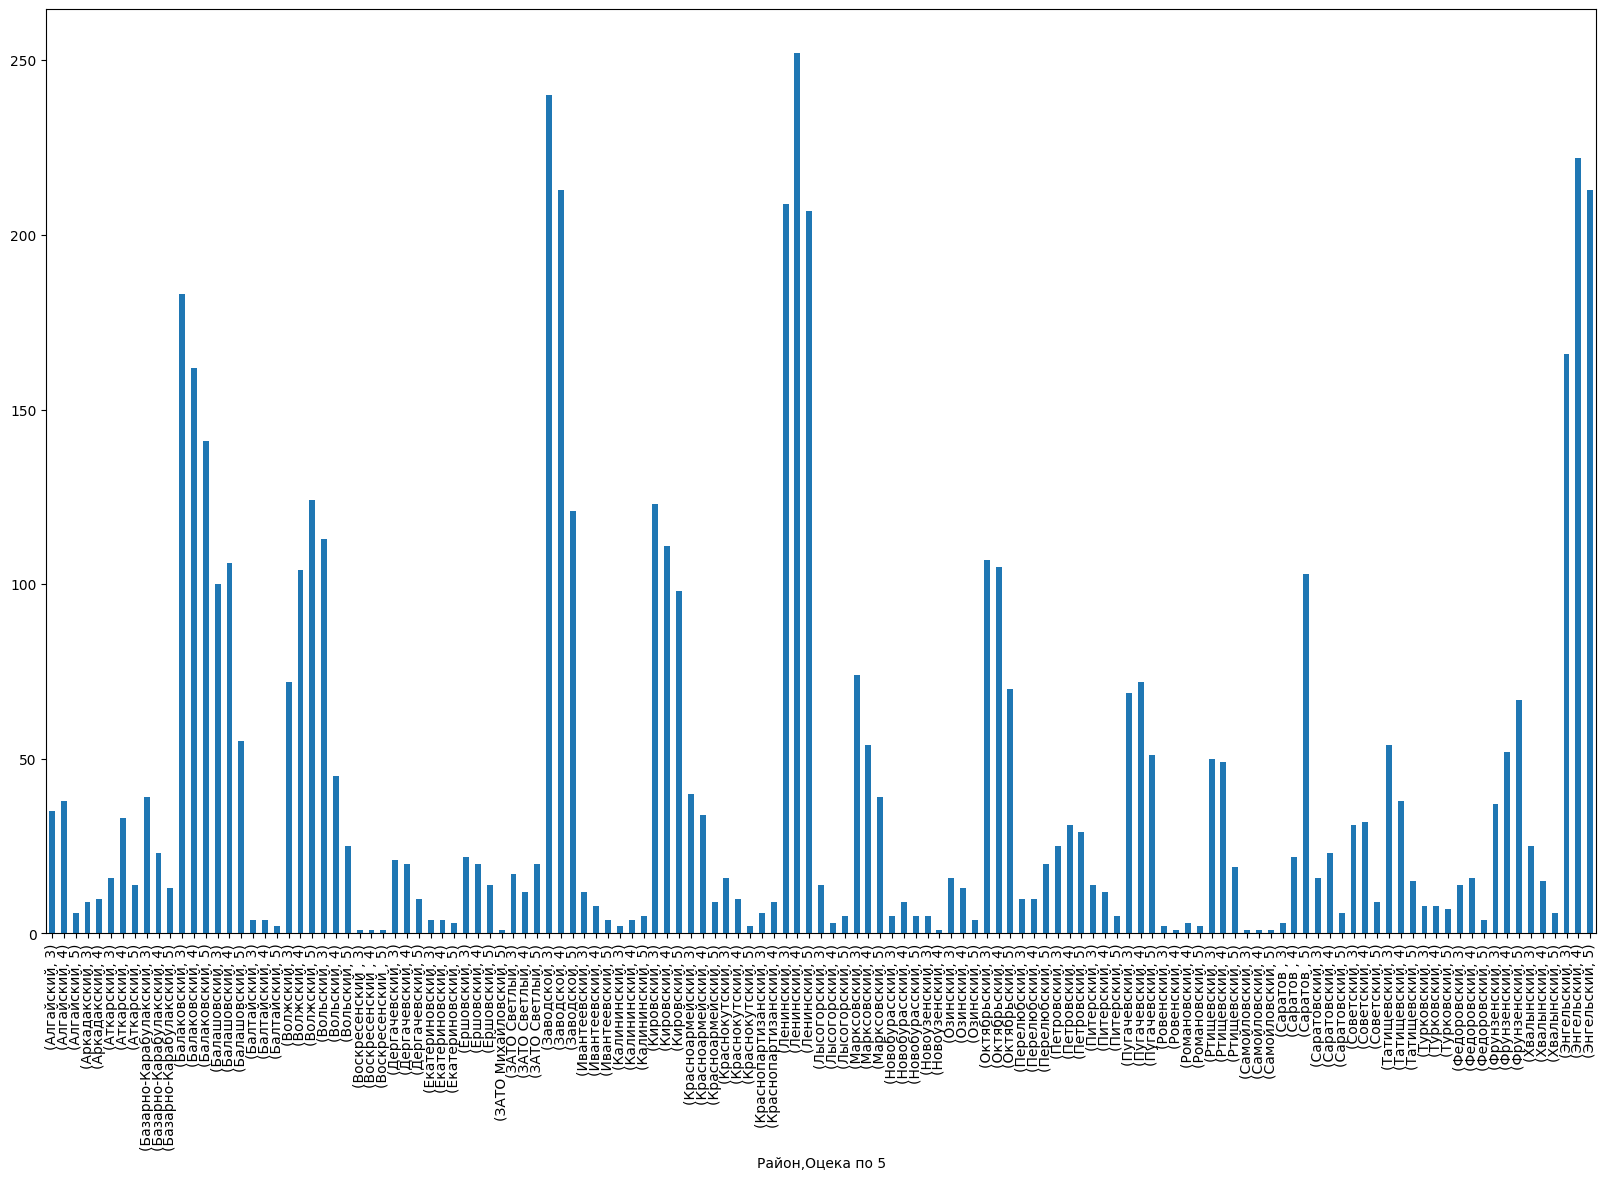

In [ ]:
#3
df1_copy = df1.copy()
df2_copy = df2.copy()
df1_copy['Код ОО'] = df1_copy['Код ОО'].apply(lambda x: x//1000)
df1_copy = df1_copy.rename(columns = {'Код ОО':'Код района'})
df_copy_copy = pd.merge(df1_copy,df2_copy,on = 'Код района')
df_copy_copy = df_copy_copy[df_copy_copy['Оцека по 5']>2]
df_copy_copy = df_copy_copy.groupby(['Район', 'Оцека по 5']).size()
df_copy_copy.plot.bar(x = 'Район', y ='Оцека по 5',figsize = (20,12))

In [ ]:
#4-5
df1_copy = df1.copy()
df1_copydop = df1.copy()
df1_copycount = df1_copydop.groupby('Краткое наименование ОО').size()
df1_copycount = pd.DataFrame({'Краткое наименование ОО':df1_copycount.index, 'Count':df1_copycount.values})
df1_copycount = df1_copycount[df1_copycount['Count']>=10]
df1_copy_bests = df1_copy.groupby('Краткое наименование ОО')['% Оценка'].mean()
df1_copy_bests = pd.DataFrame({'Краткое наименование ОО':df1_copy_bests.index, '% Оценка':df1_copy_bests.values})
df1_copy_copy = pd.merge(df1_copycount,df1_copy_bests,on = 'Краткое наименование ОО').sort_values('% Оценка',ascending = False)
print(df1_copy_copy.head(10))
print()
print()
print(df1_copy_copy.tail(10))

                Краткое наименование ОО  Count   % Оценка
16  МАОУ "Физико-технический лицей № 1"    106  91.792453
20                             МАОУ ЛМИ     49  90.816327
5                   МАОУ "Гимназия № 3"     29  89.137931
6                   МАОУ "Гимназия № 4"     47  88.659574
17                    МАОУ Гимназия № 1     26  88.269231
13               МАОУ "МБЛ" г. Саратова     25  86.680000
10         МАОУ "Лицей № 36" г.Саратова     48  86.437500
52                       МБОУ "СОШ № 4"     15  85.866667
74          МОУ "Лицей прикладных наук"     52  85.653846
21                       МАОУ Лицей № 1     65  85.600000


                               Краткое наименование ОО  Count   % Оценка
80                                      МОУ "ООШ № 17"     15  35.866667
134                                     МОУ "СОШ № 57"     31  35.645161
97                                     МОУ "СОШ № 102"     32  35.250000
57   МБОУ "Средняя общеобразовательная школа №1 р.п...     14  35.21

In [ ]:
#6
df1_copy = df1.copy()
df2_copy = df2.copy()
df1_copy['Код ОО'] = df1_copy['Код ОО'].apply(lambda x: x//1000)
df1_copy = df1_copy.rename(columns = {'Код ОО':'Код района'})
df_copy_copy = pd.merge(df1_copy,df2_copy,on = 'Код района')
df_copy_copy = df_copy_copy[['% Оценка', 'Расстояние до Саратова']]
df_copy_copy = df_copy_copy.corr()
print(df_copy_copy)

                        % Оценка  Расстояние до Саратова
% Оценка                1.000000               -0.112376
Расстояние до Саратова -0.112376                1.000000
